In [176]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [177]:
import time
import torch
import numpy as np
import random

# torch.manual_seed(111)
# torch.cuda.manual_seed(111)
# np.random.seed(111)
# random.seed(111)
# torch.backends.cudnn.enabled=False
torch.backends.cudnn.deterministic=True

In [228]:
ncc = 2
n_epochs = 5
bn_size = 200

In [229]:

start_time = time.time()
%run autoenc_br.py --epochs {n_epochs} --connected_components {ncc} --dataset colmnist --regularizer svd --bn_size {bn_size} --n_workers 0
print("--- %s seconds ---" % (time.time() - start_time))
torch.save(trainer.model, "colmnist_disent_100.pt")

/opt/conda/lib/python3.8/site-packages/torch/nn/functional.py:1797: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Batch 1, training loss 0.2607, val loss 0.2621, block_reg 0.94, dropout rate 0.50


/diseNN/models.py:142: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.in_mask = torch.tensor(mask, requires_grad=False).to(self.weight.get_device())
/diseNN/models.py:146: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.out_mask = torch.tensor(mask, requires_grad=False).to(self.weight.get_device())


Pruned to 199 neurons
Pruned to 198 neurons
Batch 101, training loss 0.0536, val loss 0.0582, block_reg 0.94, dropout rate 0.50
Pruned to 197 neurons
Batch 201, training loss 0.0372, val loss 0.0398, block_reg 0.93, dropout rate 0.50
Pruned to 196 neurons
Batch 301, training loss 0.0339, val loss 0.0388, block_reg 0.93, dropout rate 0.50
Pruned to 195 neurons
Batch 401, training loss 0.0367, val loss 0.0305, block_reg 0.93, dropout rate 0.50
Pruned to 194 neurons
Batch 501, training loss 0.0306, val loss 0.0279, block_reg 0.93, dropout rate 0.50
Pruned to 193 neurons
Batch 601, training loss 0.0256, val loss 0.0268, block_reg 0.92, dropout rate 0.50
Pruned to 192 neurons
Batch 701, training loss 0.0252, val loss 0.0236, block_reg 0.92, dropout rate 0.50
Pruned to 191 neurons
Batch 801, training loss 0.0240, val loss 0.0224, block_reg 0.92, dropout rate 0.50
Pruned to 190 neurons
Batch 901, training loss 0.0214, val loss 0.0225, block_reg 0.92, dropout rate 0.50
Pruned to 189 neurons
Ba

Batch 1801, training loss 0.0171, val loss 0.0139, block_reg 0.73, dropout rate 0.50
Pruned to 116 neurons
Train epoch 4, loss 0.014853332979977131
Batch 1, training loss 0.0138, val loss 0.0115, block_reg 0.73, dropout rate 0.50
Pruned to 115 neurons
Pruned to 114 neurons
Batch 101, training loss 0.0139, val loss 0.0133, block_reg 0.73, dropout rate 0.50
Pruned to 113 neurons
Batch 201, training loss 0.0162, val loss 0.0126, block_reg 0.73, dropout rate 0.50
Pruned to 112 neurons
Batch 301, training loss 0.0131, val loss 0.0134, block_reg 0.72, dropout rate 0.50
Pruned to 111 neurons
Batch 401, training loss 0.0135, val loss 0.0122, block_reg 0.72, dropout rate 0.50
Pruned to 110 neurons
Batch 501, training loss 0.0138, val loss 0.0120, block_reg 0.72, dropout rate 0.50
Pruned to 109 neurons
Batch 601, training loss 0.0155, val loss 0.0133, block_reg 0.72, dropout rate 0.50
Pruned to 108 neurons
Batch 701, training loss 0.0150, val loss 0.0129, block_reg 0.72, dropout rate 0.50
Pruned

<Figure size 432x288 with 0 Axes>

In [230]:
# start_time = time.time()
# %run autoenc_baseline.py --epochs {n_epochs} --dataset colmnist --bn_size {bn_size} --n_workers 0
# print("--- %s seconds ---" % (time.time() - start_time))
# torch.save(trainer.model, "colmnist_not_disent.pt")

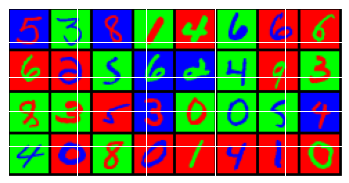

Image shape: torch.Size([3, 28, 28])


In [231]:
from plotting_utils import show_dataset_examples
show_dataset_examples(trainer)

In [232]:
# from plotting_utils import get_test_sample
# test_examples = get_test_sample(trainer)

In [233]:
(len(trainer.train_loader)/trainer.batch_size)

58.59375

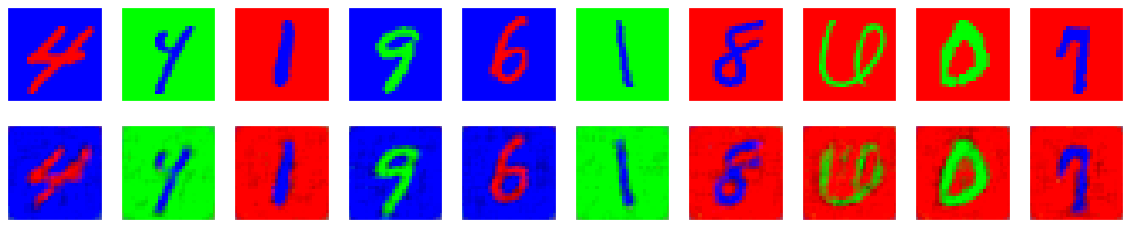

In [234]:
from plotting_utils import show_reconstruction
show_reconstruction(test_examples, trainer)

In [235]:
ncc = 2

In [236]:
from models import block_regularizer
block_regularizer(trainer.model.encoder_output_layer, ncc)

tensor(0.6878, device='cuda:0', grad_fn=<RsubBackward1>)

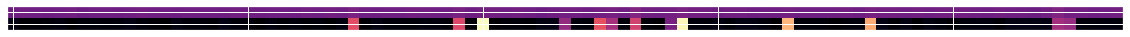

In [237]:
from models import layer_svd
import matplotlib.pyplot as plt

enc_layer = trainer.model.encoder_output_layer
u, s, v = layer_svd(enc_layer)
u = u.detach().cpu().numpy()
s = s.detach().cpu().numpy()
v = v.detach().cpu().numpy()
plt.figure(figsize=(20, 20))
plt.imshow(u[:, :ncc].transpose(1, 0), cmap="magma")

In [238]:
from models import compute_layer_blocks_out, compute_layer_blocks_in
blocks = compute_layer_blocks_out(enc_layer, ncc)
len(blocks)
print(blocks)

tensor([-1, -1, -1, -1, -1, -1,  0, -1,  0, -1, -1,  0, -1, -1,  0, -1,  0, -1,
         0, -1,  0, -1,  0,  0, -1,  0, -1, -1, -1,  0,  0, -1,  0,  0, -1, -1,
        -1, -1, -1, -1,  0,  0,  0, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0,  0,
         0, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1, -1,  0, -1, -1, -1,  0,
        -1,  0, -1,  0,  0,  0, -1,  1,  0,  0, -1, -1, -1, -1, -1,  0, -1,  0,
        -1,  0,  0,  0, -1,  0,  1, -1, -1, -1,  0, -1,  1,  0,  0,  0, -1,  0,
         0, -1, -1, -1,  0,  1,  0,  0,  1,  1, -1,  0,  1, -1,  0, -1, -1,  0,
        -1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,
         0,  1, -1, -1, -1,  0,  0,  0, -1,  0, -1,  0, -1, -1,  0, -1,  1, -1,
         0,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0,  0, -1,
         0, -1, -1,  0, -1, -1, -1, -1,  0, -1,  1,  1,  0, -1, -1, -1,  0, -1,
         0,  0], dtype=torch.int32)


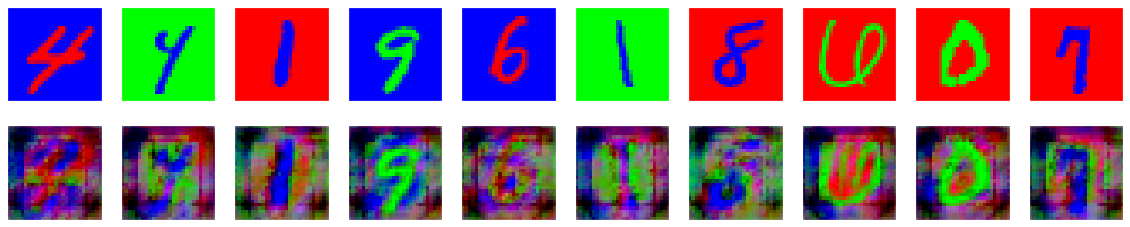

tensor([False, False, False, False, False, False,  True, False,  True, False,
        False,  True, False, False,  True, False,  True, False,  True, False,
         True, False,  True,  True, False,  True, False, False, False,  True,
         True, False,  True,  True, False, False, False, False, False, False,
         True,  True,  True, False, False, False, False,  True, False, False,
        False, False,  True,  True,  True, False, False, False, False, False,
        False,  True, False, False,  True, False, False,  True, False, False,
        False,  True, False,  True, False,  True,  True,  True, False, False,
         True,  True, False, False, False, False, False,  True, False,  True,
        False,  True,  True,  True, False,  True, False, False, False, False,
         True, False, False,  True,  True,  True, False,  True,  True, False,
        False, False,  True, False,  True,  True, False, False, False,  True,
        False, False,  True, False, False,  True, False, False, 

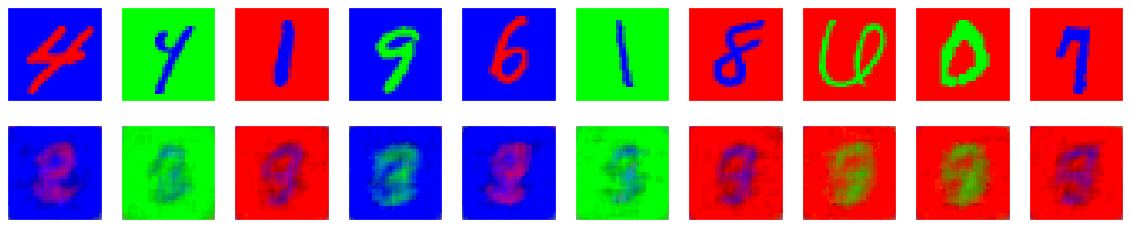

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False, False, False,
        False, False,  True, False, False, False, False, False, False, False,
        False, False, False,  True, False, False,  True,  True, False, False,
         True, False, False, False, False, False, False,  True, 

In [239]:
from plotting_utils import plot_reconstruction

for c in range(max(blocks)+1):
    plt.figure(figsize=(20, 20)) 
    plt.imshow([blocks.numpy()==c], cmap='magma')
    enc_layer.turn_output_neurons_off(blocks==c)
    
    show_reconstruction(test_examples, trainer)
    
    print(enc_layer.out_mask)
    enc_layer.turn_all_output_neurons_on()

In [240]:
trainer.model

AE(
  (encoder_0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (encoder_1): Sequential(
    (0): ReLU(inplace=True)
    (1): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (2): ReLU(inplace=True)
  )
  (encoder_hidden_layer): Linear(in_features=6400, out_features=1024, bias=True)
  (encoder_output_layer): DisentangledLinear(in_features=1024, out_features=200, bias=True)
  (block_dropout_1): BlockDropout(
    p=0.5, inplace=False
    (layer): DisentangledLinear(in_features=1024, out_features=200, bias=True)
  )
  (decoder_hidden_layer): DisentangledLinear(in_features=200, out_features=1024, bias=True)
  (block_dropout_2): BlockDropout(
    p=0.5, inplace=False
    (layer): DisentangledLinear(in_features=200, out_features=1024, bias=True)
  )
  (decoder_output_layer): Linear(in_features=1024, out_features=6400, bias=True)
  (decoder): Sequential(
    (0): ConvTranspose2d(16, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(6, 3, kerne

In [241]:

def plot_blocked_weights(layer):
    plt.figure(figsize=(20, 7))
    blocks_in = compute_layer_blocks_in(layer, ncc)
    blocks_out = compute_layer_blocks_out(layer, ncc)
    plt.imshow(layer.weight[np.argsort(blocks_out)][:, np.argsort(blocks_in)].cpu().detach().numpy(), cmap='magma')
    plt.show()


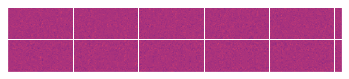

In [242]:
new_weight = np.zeros(enc_layer.weight.shape)
blocks_out = compute_layer_blocks_out(enc_layer, ncc)
blocks_in = compute_layer_blocks_in(enc_layer, ncc)
for i in range(ncc):
    mask = np.ones(enc_layer.weight.shape, dtype=bool)
    mask[blocks_out!=i] = 0
    mask[:, blocks_in!=i] = 0
    new_weight[mask] = enc_layer.weight.detach().cpu()[mask]
    
plt.imshow(new_weight, cmap='magma')

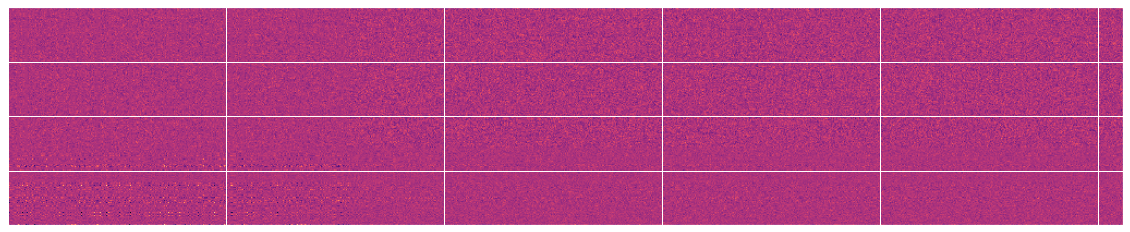

In [243]:
plot_blocked_weights(enc_layer)

In [257]:
enc_layer.weight = nn.Parameter(torch.tensor(new_weight).cuda().float())

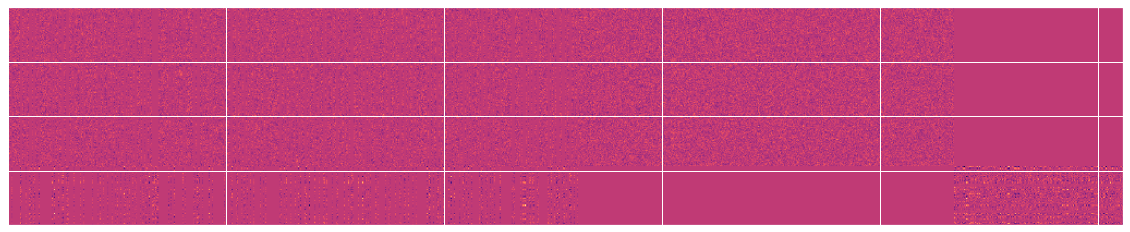

In [207]:
plot_blocked_weights(enc_layer)

In [ ]:
np.where(blocks==0)

In [ ]:
for c in range(ncc):
    print("block {}".format(c))
    for n in np.where(blocks==c)[0]:
        mask = torch.zeros(60, dtype=torch.float)
        mask[n] = 1
        print(n)
        enc_layer.turn_output_neurons_off(mask)

        with torch.no_grad():
            reconstruction = trainer.model(test_examples)
        plot_reconstruction(test_examples.detach(), reconstruction.detach().cpu())
        print(trainer.criterion(test_examples, reconstruction))
        enc_layer.turn_all_output_neurons_on()

In [ ]:
relative_error = [None]*bn_size
for c in range(ncc):
    mask = torch.zeros(60, dtype=torch.float)
    mask[blocks==c] = 1
    enc_layer.turn_output_neurons_off(mask)
    with torch.no_grad():
        reconstruction = trainer.model(test_examples)
    block_error = trainer.criterion(test_examples, reconstruction).item()
    enc_layer.turn_all_output_neurons_on()
        
    #print("block {}".format(c))
    for n in np.where(blocks!=c)[0]:
        mask = torch.zeros(60, dtype=torch.float)
        mask[blocks==c] = 1
        mask[n] = 1
        #print(n)
        #plt.figure(figsize=(20, 20)) 
        #plt.imshow(mask.unsqueeze(0), cmap='magma')
        enc_layer.turn_output_neurons_off(mask)

        with torch.no_grad():
            reconstruction = trainer.model(test_examples)
        #plot_reconstruction(test_examples.detach(), reconstruction.detach().cpu())
        relative_error[n] = block_error - trainer.criterion(test_examples, reconstruction).item()
        enc_layer.turn_all_output_neurons_on()

In [ ]:
relative_error

In [ ]:

plt.figure()
plt.hist(np.array(relative_error)[blocks==0])
plt.figure()
plt.hist(np.array(relative_error)[blocks==1])
thr = np.percentile(np.array(relative_error), 20)
re_mask = np.array([e>thr for e in relative_error])
re_mask.sum()

In [ ]:
for c in range(ncc):
    mask = np.logical_and(np.array(blocks==c), re_mask)
    plt.figure(figsize=(20, 20)) 
    plt.imshow(torch.tensor(mask).unsqueeze(0), cmap='magma')
    enc_layer.turn_output_neurons_off(mask)
    
    show_reconstruction(test_examples, trainer)
    enc_layer.turn_all_output_neurons_on()

In [ ]:
srt_enc = np.argsort(v.transpose(1, 0)[:, 1]).tolist()
srt_hidden = np.argsort(u.transpose(1, 0)[:, 1]).tolist()

trainer.model.set_mask(None)

w1 = trainer.model.encoder_output_layer.weight.cpu().detach()
w1 = w1[:, srt_enc]
w1 = w1[srt_hidden, :]


In [ ]:
srt_enc

In [ ]:
plt.figure(figsize=(20, 20)) 
plt.imshow((w1).cpu().numpy(), cmap='magma')

In [ ]:
binned_examples = [[[] for _ in range(3)] for _ in range(10)]
for batch_features in trainer.test_loader:
    batch_features, (digit, _, clr) = batch_features
    for i in range(len(batch_features)):
        binned_examples[digit[i].item()][clr[i].item()].append(batch_features[i].to(device))

In [ ]:
for d in range(10):
    for clr in range(3):
        binned_examples[d][clr] = torch.stack(binned_examples[d][clr]).to(device)
        print(binned_examples[d][clr].shape)

In [ ]:
losses = []
for _ in range(ncc):
    losses.append(torch.zeros((3, 10)))
    
for c in range(ncc):
    mask = torch.zeros(w.shape)
    mask.shape
    mask[blocks==c] = 1
    plt.figure(figsize=(20, 20)) 
    plt.imshow(mask[:, :1].transpose(1, 0), cmap='magma')
    trainer.model.set_mask(mask)
    
    for clr in range(3):
        for d in range(10):
            with torch.no_grad():
                reconstruction = trainer.model(binned_examples[d][clr]).cpu()
            show_reconstruction(binned_examples[d][clr], reconstruction)
            losses[c][clr][d] = trainer.criterion(binned_examples[d][clr], reconstruction.cuda())

In [ ]:

for c in range(ncc):
    plt.grid(False)
    plt.imshow(losses[c], cmap="magma")
    plt.show()
    print(losses[c])

           

In [ ]:
print(losses[0].sum(0))
print(losses[0].sum(1))
print(losses[1].sum(0))
print(losses[1].sum(1))

In [ ]:
def block_dropout(blocks, prob):
    mask = torch.zeros(len(blocks), dtype=torch.bool)
    first_mask = torch.rand(((blocks==0).sum(), )) < prob
    mask[blocks==0] = first_mask
    p = first_mask.sum()/len(first_mask)
    for i in range(1, max(blocks)+1):
        new_mask = torch.zeros(((blocks==i).sum(), ), dtype=torch.bool)
        new_mask[:int(p*len(new_mask))] = 1
        mask[blocks==i] = new_mask[torch.randperm(len(new_mask))]

    return mask.float()

block_dropout(blocks, 0.2)

In [ ]:
b_test = np.array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])
for i in range(20):
    d = block_dropout(b_test, 0.3)
    print(d[:8].sum().item(), d[8:].sum().item())
    print(d)

# T-SNE

In [258]:
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [259]:
# Utility function to visualize the outputs of PCA and t-SNE
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [260]:
embeddings = []
targets = []
d_targets = []
c_targets = []
for batch_features, (digit, _, clr) in trainer.test_loader:
    with torch.no_grad():
        reconstruction = trainer.model(batch_features.cuda()).cpu()
        embeddings.append(trainer.model.embedding)
        d_targets.extend(digit.tolist())
        c_targets.extend(clr.tolist())
        #targets.extend([str(d)+"_"+str(c) for d, c in zip(digit.tolist(), clr.tolist())])

/opt/conda/lib/python3.8/site-packages/torch/nn/functional.py:1797: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [261]:
df_emb = torch.vstack(embeddings).detach().cpu().numpy()
targets = [c*10+d for d, c in zip(d_targets, c_targets)]

In [262]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_emb)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 2.097s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.552840
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.074623
[t-SNE] KL divergence after 300 iterations: 2.723949
t-SNE done! Time elapsed:

/tmp/ipykernel_6912/353655322.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(-4.4784775, 3.9933448, '0'),
  Text(2.0744853, -2.7158914, '1'),
  Text(1.9693643, -4.4431405, '2'),
  Text(-1.2808026, 4.237191, '3'),
  Text(-0.4750058, -6.570874, '4'),
  Text(0.96616936, -5.202873, '5'),
  Text(-2.9567294, 3.6475835, '6'),
  Text(-1.6261175, -3.8201635, '7'),
  Text(-1.3655477, 4.9775248, '8'),
  Text(-0.8408484, -6.0626345, '9'),
  Text(6.1780405, -2.8983736, '10'),
  Text(2.331451, -1.3799462, '11'),
  Text(-0.48700687, -1.573871, '12'),
  Text(-2.174727, -2.0307803, '13'),
  Text(4.783281, -0.7858372, '14'),
  Text(0.52823466, -1.9887621, '15'),
  Text(0.59191465, -1.2653995, '16'),
  Text(4.1423674, 0.07995744, '17'),
  Text(5.370556, -1.2563943, '18'),
  Text(4.0573606, -1.2527947, '19'),
  Text(4.784731, 7.8703938, '20'),
  Text(-0.51765543, 1.4601526, '21'),
  Text(0.09228155, 2.5802097, '22'),
  Text(-5.9953146, 1.2583015, '23'),
  Text(-4.5044036, 1.5256425, '24'),
  Text(-3.6848006, 0.7901511, '2

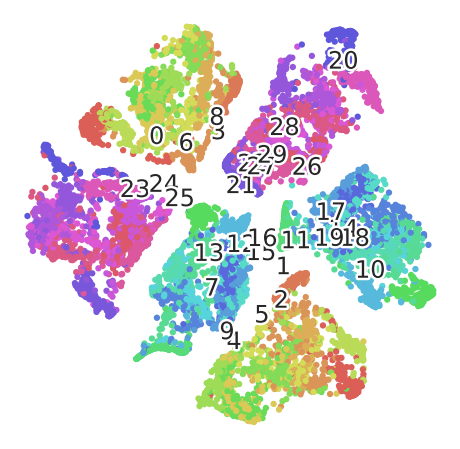

In [263]:
fashion_scatter(tsne_results, np.array(targets))


/tmp/ipykernel_6912/353655322.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(-0.56602967, -2.7730362, '0'),
  Text(2.4385436, -1.6882252, '1'),
  Text(-0.41897446, 2.5171947, '2')])

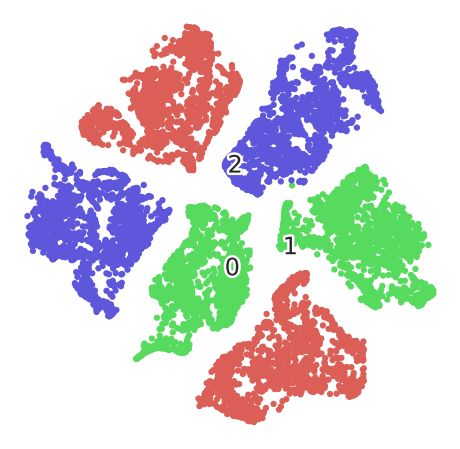

In [264]:
fashion_scatter(tsne_results, np.array(c_targets))

/tmp/ipykernel_6912/353655322.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(-0.98456526, 2.5159874, '0'),
  Text(-0.047070052, -1.3814205, '1'),
  Text(0.2060653, -0.27767962, '2'),
  Text(-1.323698, -0.9901309, '3'),
  Text(0.021979868, 0.13716027, '4'),
  Text(0.26096463, -0.9352642, '5'),
  Text(2.3173032, 0.32819387, '6'),
  Text(-0.4520412, 0.25346625, '7'),
  Text(0.96416223, -0.5127716, '8'),
  Text(-0.22197029, 0.108362526, '9')])

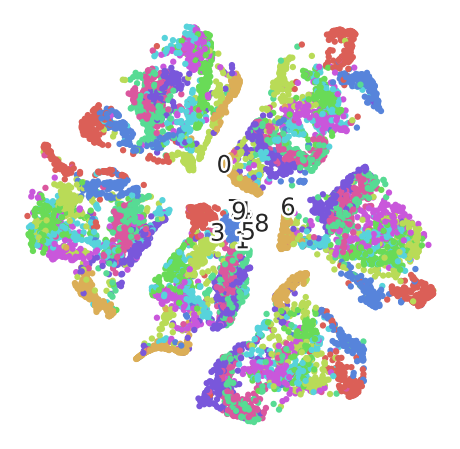

In [265]:
fashion_scatter(tsne_results, np.array(d_targets))

In [266]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results_block0 = tsne.fit_transform(df_emb[:, blocks==0])
tsne_results_block1 = tsne.fit_transform(df_emb[:, blocks==1])
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.000s...
[t-SNE] Computed neighbors for 10000 samples in 1.864s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.309054
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.694649
[t-SNE] KL divergence after 300 iterations: 2.777736
[t-SNE] Computing 121 nea

/tmp/ipykernel_6912/353655322.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(-3.0610871, -0.5322455, '0'),
  Text(0.14307839, -2.7261581, '1'),
  Text(0.09399759, 2.0083046, '2')])

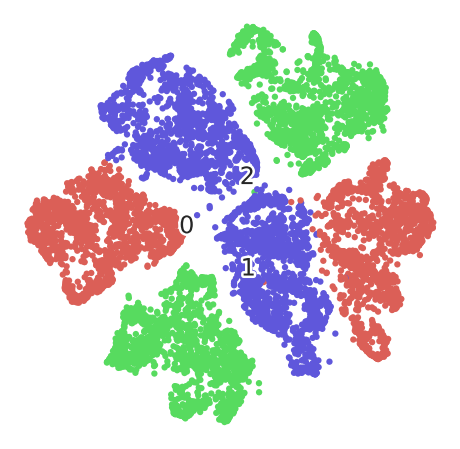

In [267]:
fashion_scatter(tsne_results_block0, np.array(c_targets))

/tmp/ipykernel_6912/353655322.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(-0.32233137, 1.1257044, '0'),
  Text(0.7297043, 0.39153787, '1'),
  Text(0.011327363, -0.12388548, '2'),
  Text(0.73857033, 0.030201647, '3'),
  Text(-1.4137387, -1.162282, '4'),
  Text(1.6853241, 0.23105231, '5'),
  Text(0.13593706, 0.4056601, '6'),
  Text(-0.74367493, -0.5849459, '7'),
  Text(-0.8048953, 0.5244366, '8'),
  Text(-1.1424212, -0.6382899, '9')])

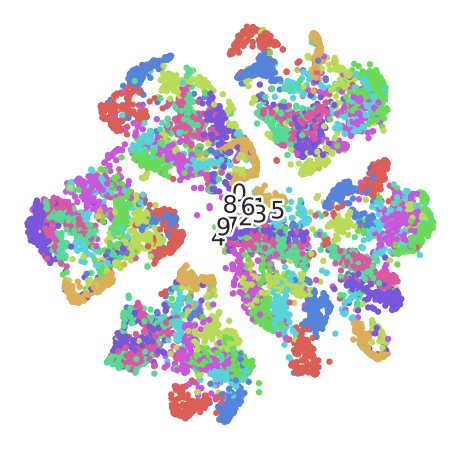

In [268]:
fashion_scatter(tsne_results_block0, np.array(d_targets))

/tmp/ipykernel_6912/353655322.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(3.4888403, 0.32326424, '0'),
  Text(1.9146367, 1.7064348, '1'),
  Text(-0.70029706, -3.3814764, '2')])

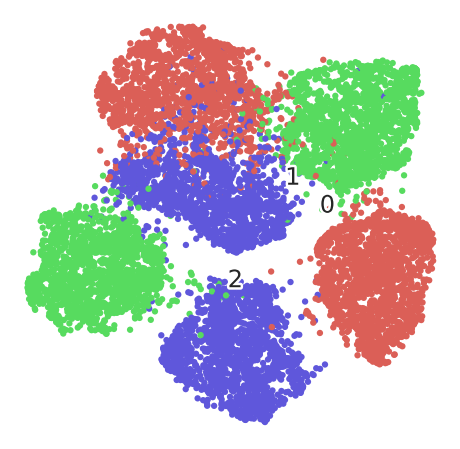

In [269]:
fashion_scatter(tsne_results_block1, np.array(c_targets))

/tmp/ipykernel_6912/353655322.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(0.81191593, -0.59537137, '0'),
  Text(0.54868406, 0.1539899, '1'),
  Text(0.6329998, -0.6563124, '2'),
  Text(-0.055911414, -0.7343483, '3'),
  Text(-0.22976506, -0.020756856, '4'),
  Text(-0.6715039, -0.5302633, '5'),
  Text(-0.58940434, -0.0431497, '6'),
  Text(-1.2232465, -0.14540756, '7'),
  Text(-0.6062891, -0.962198, '8'),
  Text(-1.5082736, -0.29065403, '9')])

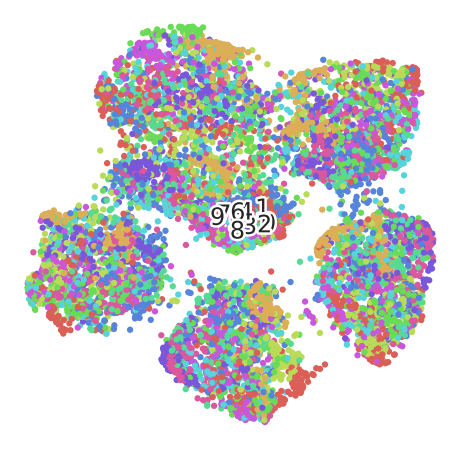

In [270]:
fashion_scatter(tsne_results_block1, np.array(d_targets))

# Dependencies between blocks

In [ ]:
plt.rcParams["axes.grid"] = False
plt.figure(figsize=(20, 20)) 
plt.imshow(np.cov(df_emb[:, blocks==0].transpose(1, 0)))
plt.colorbar()

In [ ]:
plt.figure(figsize=(20, 20)) 
plt.imshow(np.cov(df_emb[:, blocks==1].transpose(1, 0)))
plt.colorbar()

In [ ]:
full_corr = np.corrcoef(df_emb[:, blocks==0].transpose(1, 0), df_emb[:, blocks==1].transpose(1, 0))
plt.figure(figsize=(20, 20)) 
plt.imshow(full_corr)
plt.colorbar()

In [ ]:
full_corr = np.corrcoef(df_emb[:, blocks==0].transpose(1, 0), df_emb[:, blocks==1].transpose(1, 0))
plt.figure(figsize=(20, 20)) 
plt.imshow(full_corr)
plt.colorbar()

In [ ]:
dist = np.zeros((bn_size, bn_size))
for i in range(bn_size):
    for j in range(i, bn_size):
        dist[i, j] = np.abs(full_corr[i]-full_corr[j]).sum()
        dist[j, i] = np.abs(full_corr[i]-full_corr[j]).sum()
        
plt.figure(figsize=(20, 20)) 
plt.imshow(dist<5)
plt.colorbar()

plt.figure(figsize=(20, 20)) 
plt.hist(dist.flatten())

# Collect activations

In [ ]:
from explainn_code.grab_functions import db_from_dat_with_labels, write_pic_as_sets

activations = []
test_data = []
for batch_features, (digit, _, clr) in trainer.test_loader:
    with torch.no_grad():
        reconstruction = trainer.model(batch_features).cpu()
        activations.append(trainer.model.layer_0_out.detach().cpu().numpy())
        test_data.append(batch_features.detach().cpu().numpy())
activations = np.concatenate(activations)


In [ ]:
for i in range(6):
    write_pic_as_sets(activations[:, i, :].reshape(activations.shape[0], -1), "filters_{}.dat".format(i))

In [ ]:
test_data = np.concatenate(test_data)
write_pic_as_sets(test_data.reshape(test_data.shape[0], -1), "test_data.dat")

In [ ]:
for i in range(6):
    db_from_dat_with_labels("filters_{}.dat".format(i), "test_data.dat", "data{}.db".format(i))